<h5> First I imported all neccessary librarys.
Then I tokenized the Comedy movie "Bachelor Party". 
The plot describes the tone of the sentences in the text. 
The story is pretty smooth throughout but there are two major dips as you can see on the plot.
I then smoothed out the graph to make it easier to understand. 
Next, I created a graph for the polarity and subjectivity of the story.
The story is extremely subjective, which makes sense since it is a bachelor party, so there is going to be mostly dialogue and subjected language.
The polarity if high in beginning then goes straight then at the end it tends to go very negative.</h5>

In [1]:
import textwrap
def display_text(text):
    wrap_list = textwrap.wrap(text, 72)
    return wrap_list

In [2]:
# IMPORTS
# !pip install afinn

from nltk.tokenize import sent_tokenize
from afinn import Afinn

# Used data as Bachelor Party
afinn = Afinn()
with open("C:/Users/alex/code/ENGL370-2025/ENGL370-2025/Garcia/Data/Comedy/bachelorparty.txt", mode="r", encoding="utf-8") as f:
    bp = f.read()

# Tokenize the sentences
sentences = sent_tokenize(bp)

# Assign each sentence a sentiment score:
sentiments = []
for sentence in sentences:
    sentsent = afinn.score(sentence)
    sentiments.append(sentsent)

print(len(sentences))
print(sentiments[0:10])

  Using cached afinn-0.1.tar.gz (52 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53478 sha256=b8d0ae9d0fd2118dd50c07e2e4cc259ba67548bc1f3f951ab83dc1837ced2cb3
  Stored in directory: c:\users\alex\appdata\local\pip\cache\wheels\b0\05\90\43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn
2695
[0.0, 2.0, -1.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, -1.0]


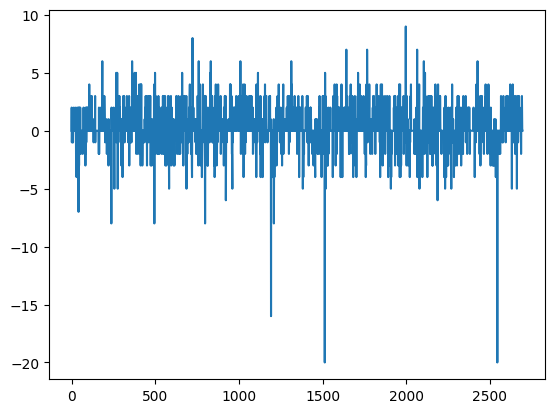

In [3]:
# I am working with 2695 sentences
# Let's graph the data instead!
import matplotlib.pyplot as plt

plt.plot(sentiments)

In [5]:
import numpy as np

def running_avg(a_list, window):
    rm_array = np.asarray(a_list)
    cumsum = np.cumsum(np.insert(rm_array, 0, 0))
    return (cumsum[window:] - cumsum[:-window]) / window

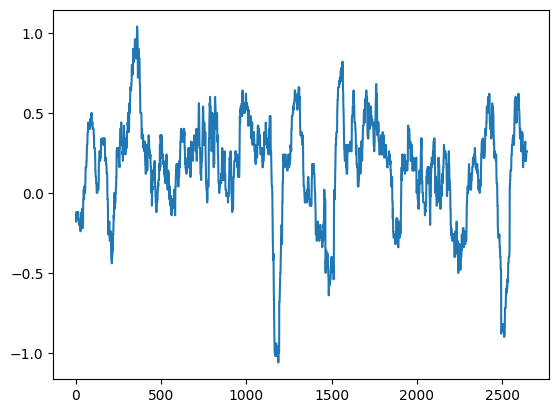

In [17]:
# We can adjust the "smoothness" of the graph 
# by changing the window size... I have set it to 50 for a smoother curve.
sentiments_avg = running_avg(sentiments, 50)
plt.plot(sentiments_avg)

In [11]:
# IMPORTS
# !pip install textblob

from textblob import TextBlob

# DATA
# Using textblock to set the polarity

# DEMO DATA
obj = TextBlob("Python is a high-level, general-purpose programming language.")
sub = TextBlob("Python is the best programming language.")

# Examining the outputs
print(f"Values for the objective statement is {obj.sentiment}.")
print(f"Values for subjective statement is {sub.sentiment}.")
print(f"The two polarities are {obj.sentiment.polarity} and {sub.sentiment.polarity}.")
print(f"The two subjectivities are {obj.sentiment.subjectivity} and {sub.sentiment.subjectivity}.")

  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)
Values for the objective statement is Sentiment(polarity=0.0, subjectivity=0.0).
Values for subjective statement is Sentiment(polarity=1.0, subjectivity=0.3).
The two polarities are 0.0 and 1.0.
The two subjectivities are 0.0 and 0.3.


In [12]:

# Bp means the bachelor party story comedy film.
bp_ = TextBlob(bp)

for sentence in bp_.sentences[0:3]:
    print(sentence)

                                     "BACHELOR PARTY"

                                      Screenplay by

                                 Neal Israel & Pat Proft

                                         Story by

                                        Bob Israel

                                   SHOOTING DRAFT (1984)

               FADE IN:

               EXT.
ST. ANN'S SCHOOL - DAY

               CAMERA PANS a group of freshly-scrubbed, innocent children, 

               obediently standing in line, like recruits for the Holy 

               Crusade.
PULL BACK to REVEAL they are wearing the gray 

               blazers, striped ties and navy slacks of St. Luke's School.


In [13]:
for sentence in bp_.sentences[0:3]:
    print(sentence.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.45, subjectivity=0.8)
Sentiment(polarity=0.0, subjectivity=0.0)


In [14]:
# Getting numbers for the sentences
sentence_count = [float(i) for i in range(0, len(bp_.sentences))]

# Getting polarity & then subjectivity ratings for each sentence
bp_polarities = [sentence.sentiment.polarity for sentence in bp_.sentences]
bp_subjectivities = [sentence.sentiment.subjectivity for sentence in bp_.sentences]

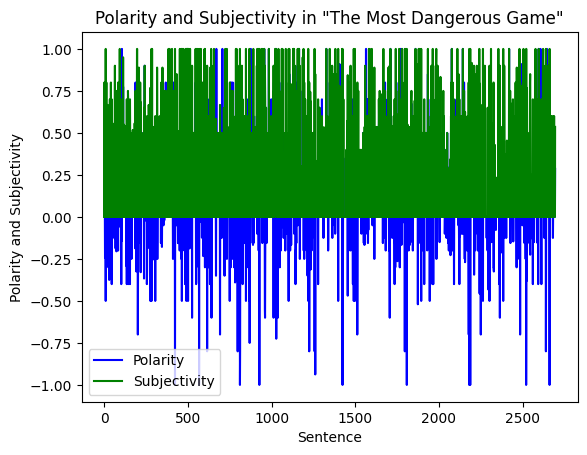

In [15]:
# Make a plot with the lines

# Our two lines
plt.plot(sentence_count, bp_polarities, 'b', label="Polarity") 
plt.plot(sentence_count, bp_subjectivities, 'g', label="Subjectivity") 

# Plot niceties
plt.xlabel("Sentence")
plt.ylabel("Polarity and Subjectivity")
plt.title('Polarity and Subjectivity in "The Most Dangerous Game"')
plt.grid(False)
plt.legend()

# Display
plt.show()

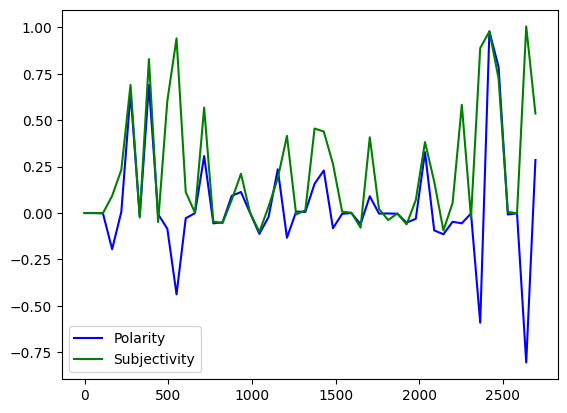

In [16]:
import numpy as np
from scipy.interpolate import interp1d

# Using SciPy's to smooth our plots
xnew = np.linspace(0, (len(sentence_count)-1)) # It didn't like the count, so I subtracted 1.
f_cubic_polar = interp1d(sentence_count, bp_polarities, kind='cubic')
f_cubic_subject = interp1d(sentence_count, bp_subjectivities, kind='cubic')

# Plot
# plt.scatter(sentence_count, mdg_polarities, 'b', ) 
# plt.scatter(sentence_count, mdg_subjectivities, 'g', ) 
plt.plot(xnew, f_cubic_polar(xnew), 'b', label="Polarity")
plt.plot(xnew, f_cubic_subject(xnew), 'g', label="Subjectivity")
plt.legend(loc='best')
plt.show()

In [ ]:
low_point = min(bp_sents)

for i, sent in enumerate(sentences):
    print(f"{i}" {sent}")

for i in enumerate(bp_sents):
    if i[1] == low_point:
    print(f"Low point at {i[0]}: 

In [20]:
# Try to find the "low point" in the graph above
# printing the low point sentence that caused the low point value
bp_sents = [afinn.score(sentence) for sentence in sentences]

low_point = min(bp_sents)

for i in enumerate(bp_sents):
    if i[1] == low_point:
        print(f"Low point at {i[0]}: {sentences[i[0]]}")
        print(f"Sentiment: {i[1]}")
        print("======")

Low point at 1513: COLE

                         Shit, shit, shit, shit, shit.
Sentiment: -20.0
Low point at 2544: PORSCHE

                                     COLE

                         Shit, shit, shit, shit, shit.
Sentiment: -20.0
